# **K-Means Clustering**

## **Introduction**

K-means clustering is one of the models of clustering in data science applications, especially if we need to discover insights from unlabeled data. In this notebook, we will need to learn K-means for blood cells.

We will first practice k-means clustering with a randomly generated dataset, and then for blood cells. 

References:
1. IBM Cousera Machine Learning Course
2. Blood Cells Data is taken from Prof Anil's Image Processing Tutorial
3. Imutils package: https://www.pyimagesearch.com/2015/02/02/just-open-sourced-personal-imutils-package-series-opencv-convenience-functions/

### **Importing Libraries**

We will first import the required libraries. Also run %matplotlib inline as we will be plotting in this section.

In [0]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline



## **K-means on Randomly Generated Dataset**

Let's first create our own dataset. We will need to set up a random seed, using **numpy's random.seed()** function, where seed will be set to **0**. This ensures that any random selection will be constant everytime we execute the code.

In [0]:
np.random.seed(0)

We will then make random classes of points. This can be done with the **make_blobs** class. The **make_blobs** class can take many inputs, but we will be using several parameters. 

<b> <u>Parameters used</u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>

<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>

In [0]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the  data. 

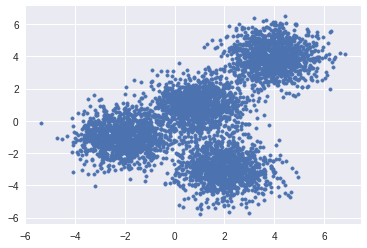

In [0]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

### **Setting Up K-means Clustering**

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

We will then need to fit the model with the matrix X that we created above. 

In [0]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Let's then save the labels for each point and and the coordinates of the updated cluster centres into a variable. 

In [0]:
k_means_labels = k_means.labels_ #we use the k_means labels_ attribute
k_means_cluster_centers = k_means.cluster_centers_ #we use te k means cluster_centers_ attribute

Let's then plot the k means model. 

[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.99346405 0.74771242 0.43529412 1.        ]
 [0.74771242 0.89803922 0.62745098 1.        ]
 [0.36862745 0.30980392 0.63529412 1.        ]]
[ True False False ... False  True  True]
[False False False ...  True False False]
[False False False ... False False False]
[False  True  True ... False False False]


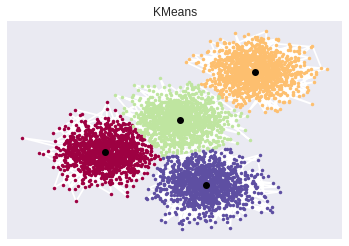

In [0]:
# Initialize the plot with the specified dimensions by figure size. In this case, the width is 6 inches and the height is 4 inches 
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map called spectral, which will produce an array of colors based on

# np.linspace takes parameters start, stop and number of samples
# docs: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html 
# generates different colours for our labelling the different clusters 
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

print(colors)

# Create a plot with position (1,1,1)
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    print(my_members)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    # remember that X is a matrix with all our data points. Only the coordinates of datapoints which are "true" are plotted
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline.
    # cluster_center[0] and cluster_center[1] are the coordinates of the cluster centres 
    ax.plot(cluster_center[0], cluster_center[1], 'ko')

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## **K-Means on Blood Cells Data**

### **Load Data**

First, we load the image in the rgb colourspace and display it. We will need the OpenCV Library of python, which is used for real-time computer vision.

(696, 876, 3)


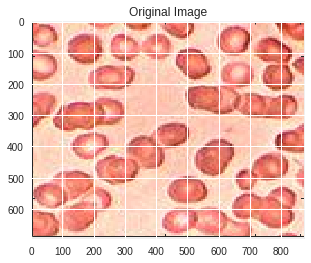

In [0]:
import imutils
import pprint
import matplotlib.pyplot as plt 
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans 
import imageio
%matplotlib inline 

image = imutils.url_to_image("https://user-images.githubusercontent.com/35939804/51367463-b7a08100-1b25-11e9-84e1-4b9afade5718.jpg")
# convert to RGB colourspace
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Show image
plt.subplot(1, 1, 1)
plt.imshow(image)
plt.title("Original Image")

print(image.shape)
image = np.asarray(image)

### **Preprocessing Data**

We will extract out the RGB values and convert them into trichromatic coefficients, which are preferrable when processing images. We will then visualise the pixels into 3D space to see approximately how many clusters there could be. 

*The normalised colour space model is useful for pattern recognition applications/ object segmentation based on colour. Try this when segmenting or labelling pixels based on colour.*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


Show the Feature Space: Trichromatic Coefficients
1/10th of pixels used for spread


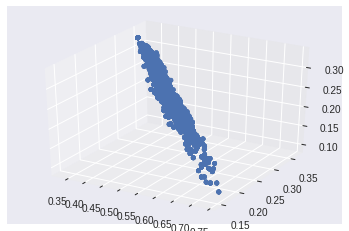

In [0]:
def myfunc(r, g, b):
  return r / (r + g + b)

trifunc = np.vectorize(myfunc)

# extract out the R, G, B values

R1 = image[:,:,0]
G1 = image[:,:,1]
B1 = image[:,:,2]

# normalise the R, G, B values, trichromatic coefficients  
X = trifunc(R1, G1, B1)
Y = trifunc(G1, R1, B1)
Z = trifunc(B1, R1, G1)

print("Show the Feature Space: Trichromatic Coefficients");
print("1/10th of pixels used for spread");
fig=plt.figure()
ax = fig.add_subplot(111, projection=Axes3D.name)
# visualise the pixels in 3D space
ax.scatter(X[1::10], Y[1::10], Z[1::10], marker="o")




### **Fitting the K Means Model**

From the 3D plot, it appears that there could be 2 clusters. In order to fit the K means model with the data, we will need to convert the image into a 2D array.

In [0]:
#need to convert image into 2D array with length being 363*550 and width(3) as RGB value
x, y, z = image.shape
image_2d = image.reshape(x*y, z)
image_2d.shape

print(image_2d.shape)

k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)

k_means.fit(image_2d)

k_means_labels = k_means.labels_ #we use the k_means labels_ attribute
k_means_cluster_centers = k_means.cluster_centers_ #we use the k means cluster_centers_ attribute

print(k_means_labels.shape)



(609696, 3)
(609696,)


### **Visualising the Clusters**

We will then visualise the clusters and the image after clustering.

[ True  True  True ...  True  True  True]
[False False False ... False False False]


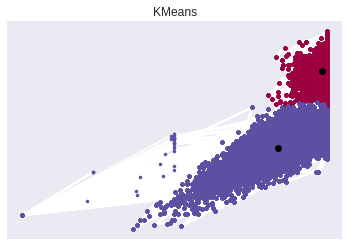

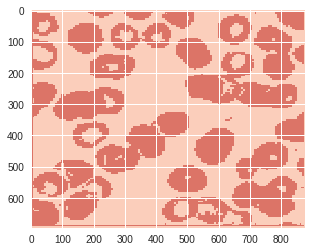

In [0]:
# Initialize the plot with the specified dimensions by figure size. In this case, the width is 6 inches and the height is 4 inches 
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map called spectral, which will produce an array of colors based on

# np.linspace takes parameters start, stop and number of samples
# docs: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html 
# generates different colours for our labelling the different clusters 
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))


# Create a plot with position (1,1,1)
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    print(my_members)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    # remember that X is a matrix with all our data points. Only the coordinates of datapoints which are "true" are plotted
    ax.plot(image_2d[my_members, 0], image_2d[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline.
    # cluster_center[0] and cluster_center[1] are the coordinates of the cluster centres 
    ax.plot(cluster_center[0], cluster_center[1], 'ko')

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
#recreating image with cluster centers
from PIL import Image

plt.subplot(1, 1, 1)

data=k_means_cluster_centers[k_means_labels].reshape(x,y,z)
image = Image.fromarray(data.astype('uint8'), 'RGB')
plt.imshow(image)


## **Segmentation of Cells**

In this section, we will like to see if we can segment out different blood cells. We follow the same procedure as the above section. However, this time, we will be expecting 3 different clusters - the background, the larger nuclei and the smaller nuclei. 

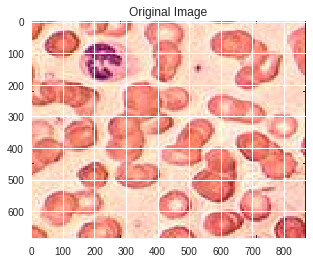

In [0]:
from collections import Counter
import imutils
import pprint
from google.colab import files
import cv2
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

image = imutils.url_to_image("https://user-images.githubusercontent.com/35939804/51367779-1dd9d380-1b27-11e9-8d14-49c6c669ba78.jpg")

# Show image
plt.subplot(1, 1, 1)
# change colorspace to rgb
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
# plt.show()

image = np.asarray(image)

Show the Feature Space: Trichromatic Coefficients
1/10th of pixels used for spread
(688, 870, 3)


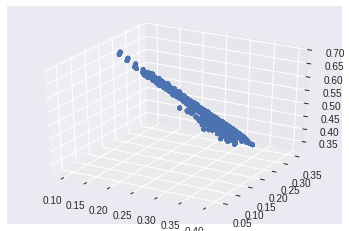

In [0]:
def myfunc(r, g, b):
  return r / (r + g + b)

trifunc = np.vectorize(myfunc)
# print(R)

# extract out the R, G, B values
R1 = image[:,:,0]
G1 = image[:,:,1]
B1 = image[:,:,2]

# normalise the R, G, B values, trichromatic coefficients  
X = trifunc(R1, G1, B1)
Y = trifunc(G1, R1, B1)
Z = trifunc(B1, R1, G1)

print("Show the Feature Space: Trichromatic Coefficients");
print("1/10th of pixels used for spread");
fig=plt.figure()
ax = fig.add_subplot(111, projection=Axes3D.name)
# visualise the pixels in 3D space
ax.scatter(X[1::10], Y[1::10], Z[1::10], marker="o")

C=[X[1::10], Y[1::10], Z[1::10]];
print(image.shape)

As seen, there are 3 distinct clusters. 

### **Fitting the K means model**

In [0]:
#need to convert image into 2D array with length being 363*550 and width(3) as RGB value
x, y, z = image.shape
image_2d = image.reshape(x*y, z)
image_2d.shape
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

k_means.fit(image_2d)

k_means_labels = k_means.labels_ #we use the k_means labels_ attribute
k_means_cluster_centers = k_means.cluster_centers_ #we use the k means cluster_centers_ attribute

### **Visualising the Clusters**

[False  True  True ... False False False]
[False False False ...  True  True  True]
[ True False False ... False False False]


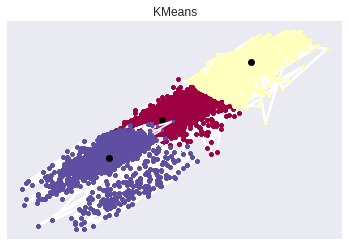

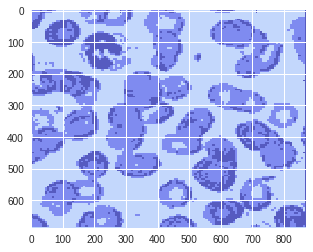

In [0]:
# Initialize the plot with the specified dimensions by figure size. In this case, the width is 6 inches and the height is 4 inches 
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map called spectral, which will produce an array of colors based on

# np.linspace takes parameters start, stop and number of samples
# docs: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html 
# generates different colours for our labelling the different clusters 
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))


# Create a plot with position (1,1,1)
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    print(my_members)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    # remember that X is a matrix with all our data points. Only the coordinates of datapoints which are "true" are plotted
    ax.plot(image_2d[my_members, 0], image_2d[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline.
    # cluster_center[0] and cluster_center[1] are the coordinates of the cluster centres 
    ax.plot(cluster_center[0], cluster_center[1], 'ko')

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
#recreating image with cluster centers

from PIL import Image

plt.subplot(1, 1, 1)

data=k_means_cluster_centers[k_means_labels].reshape(x,y,z)
image = Image.fromarray(data.astype('uint8'), 'RGB')
plt.imshow(image)